In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pynamicalsys import ContinuousDynamicalSystem as cds, PlotStyler

In [2]:
ds = cds(model="lorenz system")

In [3]:
parameters = [16, 45.92, 4]  # From A. Wolf et al. / Determining Lyapunov exponents from a time series

In [4]:
total_time = 1000
transient_time = 500
u = [1, 1, 1]

In [5]:
ds.integrator("rk4", time_step=0.01)

In [6]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

array([ 1.49004411e+00, -6.38185729e-04, -2.24884917e+01])

In [7]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, log_base=2) # To match Wolf's result

array([ 2.14967924e+00, -9.20707386e-04, -3.24440355e+01])

In [8]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)

In [9]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

array([ 1.50903548e+00,  1.68717956e-04, -2.25076975e+01])

In [10]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, log_base=2) # To match Wolf's result

array([ 2.17707801e+00,  2.43408559e-04, -3.24717436e+01])

In [11]:
ds.integrator("rk4", time_step=0.01)
history = ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

In [12]:
history.shape

(50002, 4)

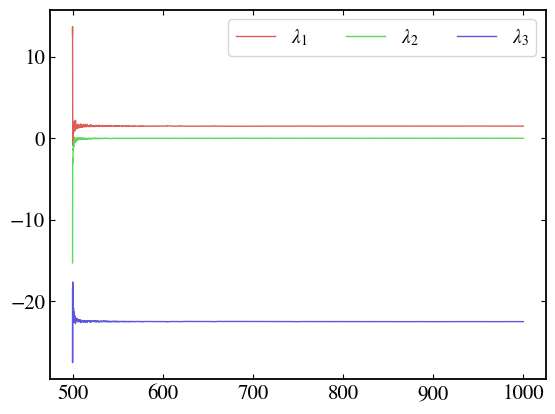

In [13]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
colors = sns.color_palette("hls", history.shape[1] - 1)
for i in range(history.shape[1] - 1):
    plt.plot(history[:, 0], history[:, i + 1], color=colors[i], label=fr"$\lambda_{i + 1}$")
plt.legend(ncol=3)

In [14]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
history_rk45 = ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

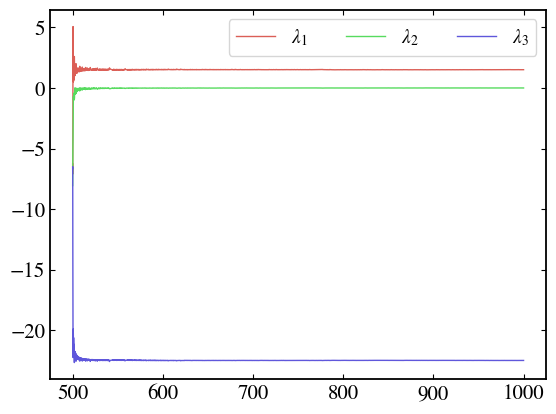

In [15]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
colors = sns.color_palette("hls", history.shape[1] - 1)
for i in range(history.shape[1] - 1):
    plt.plot(history_rk45[:, 0], history_rk45[:, i + 1], color=colors[i], label=fr"$\lambda_{i + 1}$")
plt.legend(ncol=3)

<Figure size 640x480 with 0 Axes>

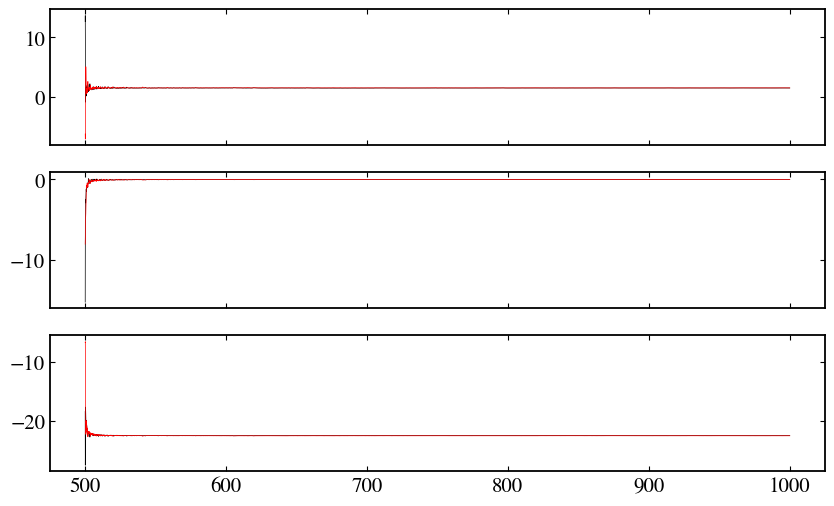

In [17]:
ps = PlotStyler(fontsize=18, linewidth=0.5)
ps.apply_style()
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
for i in range(history.shape[1] - 1):
    ax[i].plot(history[:, 0], history[:, i + 1], color="k")
    ax[i].plot(history_rk45[:, 0], history_rk45[:, i + 1], color="r")